# nbm Example and tutorial

In [118]:
%load_ext watermark
%watermark -a Filippo_Valle -p pandas,numpy,trisbm -r -b -iv -v -m

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Filippo_Valle

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

pandas: 1.5.0
numpy : 1.23.5
trisbm: 0.5.1

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 6.8.0-45-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

Git repo: git@github.com:fvalle1/trisbm

Git branch: main

numpy     : 1.23.5
graph_tool: 2.58 (commit c513b9b6, )
sys       : 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:36:39) [GCC 10.4.0]
pandas    : 1.5.0



In [119]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np
sys.path.append("../trisbm/")
from nsbm import nsbm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
df = pd.DataFrame(
index = ["w{}".format(w) for w in range(10)],
columns = ["doc{}".format(d) for d in range(25)],
data = np.random.randint(1, 10, 250).reshape((10, 25)))

df_key_list = []

## keywords
df_key_list.append(
    pd.DataFrame(
    index = ["keyword{}".format(w) for w in range(10)],
    columns = ["doc{}".format(d) for d in range(25)],
    data = np.random.randint(1, 10, (10, 25)))
)
    
## authors
df_key_list.append(
    pd.DataFrame(
    index = ["author{}".format(w) for w in range(10)],
    columns = ["doc{}".format(d) for d in range(25)],
    data = np.random.randint(1, 5, (10, 25)))
)
    
## other features
df_key_list.append(
    pd.DataFrame(
    index = ["feature{}".format(w) for w in range(25)],
    columns = ["doc{}".format(d) for d in range(25)],
    data = np.random.randint(1, 5, (25, 25)))
)

In [121]:
df.head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc15,doc16,doc17,doc18,doc19,doc20,doc21,doc22,doc23,doc24
w0,4,5,3,4,8,5,7,7,4,5,...,7,4,2,3,5,1,9,4,6,2
w1,6,3,2,3,8,6,2,7,8,8,...,1,1,8,4,3,4,1,5,3,5
w2,5,7,7,1,7,5,8,6,9,6,...,6,3,9,6,9,6,3,7,3,9
w3,9,9,2,4,9,9,7,1,1,8,...,9,5,5,4,6,5,4,6,6,4
w4,3,5,7,3,4,1,8,8,2,1,...,7,3,5,2,7,2,7,2,6,3


In [122]:
df_key_list[0].head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,...,doc15,doc16,doc17,doc18,doc19,doc20,doc21,doc22,doc23,doc24
keyword0,7,7,9,3,7,8,5,5,3,6,...,3,3,6,6,7,5,4,2,5,4
keyword1,6,8,5,2,7,1,1,5,9,1,...,5,7,1,5,4,9,7,6,7,7
keyword2,3,4,7,4,2,6,7,3,7,4,...,2,8,5,9,4,2,7,2,8,4
keyword3,1,8,4,7,7,2,4,4,5,8,...,2,6,3,7,6,2,1,8,6,4
keyword4,8,4,6,3,1,9,8,8,4,7,...,1,8,4,9,1,6,3,6,2,3


In [123]:
model = nsbm()

In [124]:
model.make_graph_multiple_df(df, df_key_list)

In [125]:
model.g.vp["kind"].a

PropertyArray([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
               2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
               4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
              dtype=int32)

In [126]:
model.nbranches

3

In [127]:
model.fit(n_init=1, B_min=50, verbose=False)

In [128]:
model._get_shape()

(25, 10, [10, 10, 25])

In [129]:
model.g

<Graph object, undirected, with 80 vertices and 1375 edges, 2 internal vertex properties, 1 internal edge property, at 0x7ba6a8773d90>

In [130]:
model.metadata(0,-1,3)

{0: [('##author3', 1.0)],
 1: [('##author5', 1.0)],
 2: [('##author4', 1.0)],
 3: [('##author6', 0.559322033898305), ('##author2', 0.4406779661016949)],
 4: [('##author9', 0.3728813559322034),
  ('##author0', 0.3502824858757062),
  ('##author7', 0.2768361581920904)],
 5: [('##author1', 0.5038759689922481), ('##author8', 0.49612403100775193)]}

In [131]:
model.serialize_data()
model.serialize_data()["levels"][0]["topics"]["trisbm_level_0_topic-dist"]

,i_doc,doc,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,0,doc0,0.09434,0.226415,0.113208,0.09434,0.358491,0.113208
1,1,doc1,0.107692,0.184615,0.046154,0.107692,0.415385,0.138462
2,2,doc2,0.038462,0.365385,0.038462,0.134615,0.307692,0.115385
3,3,doc3,0.116279,0.348837,0.069767,0.023256,0.27907,0.162791
4,4,doc4,0.018868,0.339623,0.150943,0.132075,0.320755,0.037736
5,5,doc5,0.020408,0.244898,0.122449,0.102041,0.367347,0.142857
6,6,doc6,0.140351,0.315789,0.035088,0.140351,0.245614,0.122807
7,7,doc7,0.034483,0.37931,0.12069,0.103448,0.206897,0.155172
8,8,doc8,0.056604,0.150943,0.150943,0.169811,0.320755,0.150943
9,9,doc9,0.130435,0.188406,0.115942,0.086957,0.362319,0.115942


In [132]:
model.save_rdata()

Saving level 5
Saving level 4
Saving level 3
Saving level 2
Saving level 1
Saving level 0


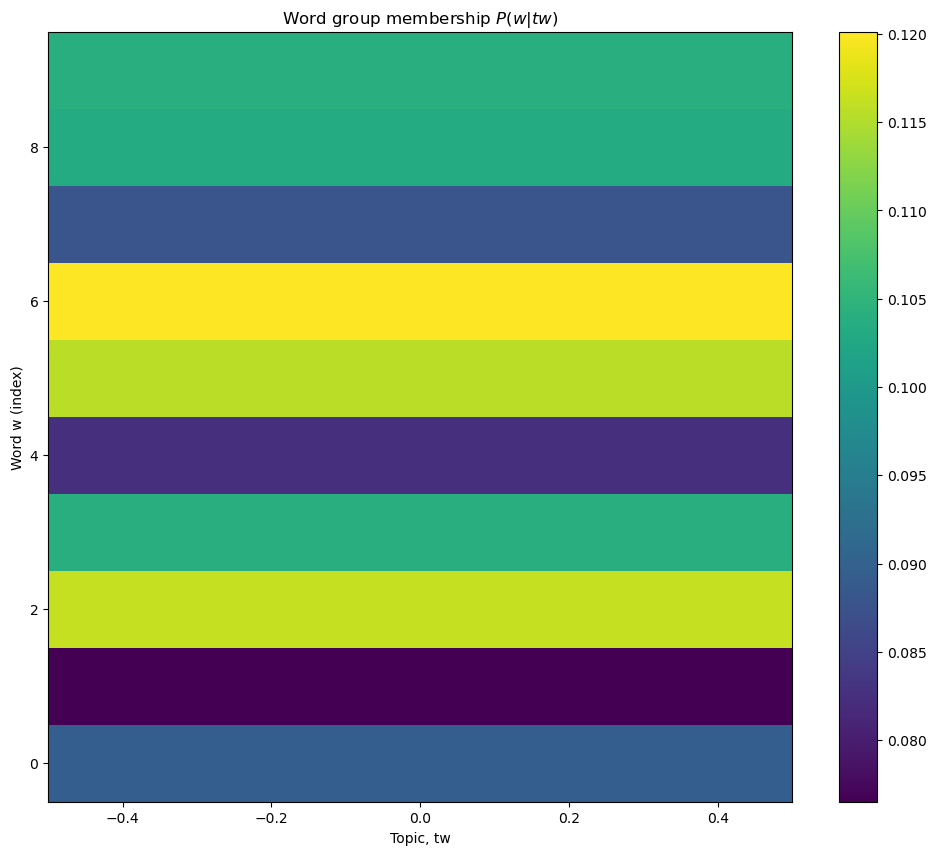

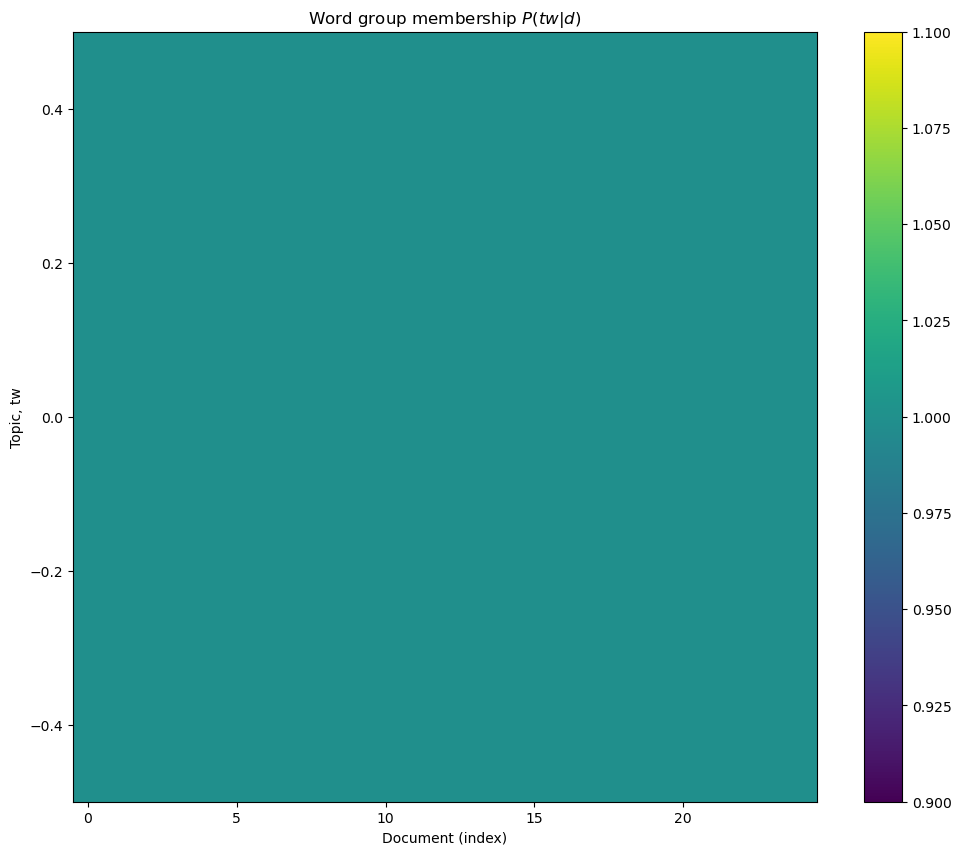

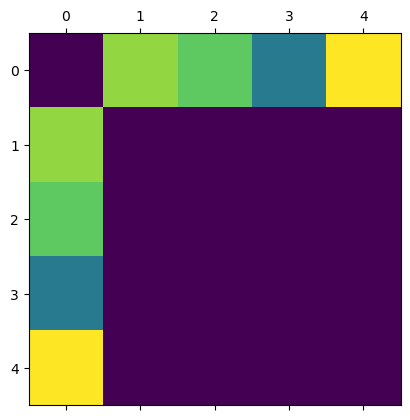

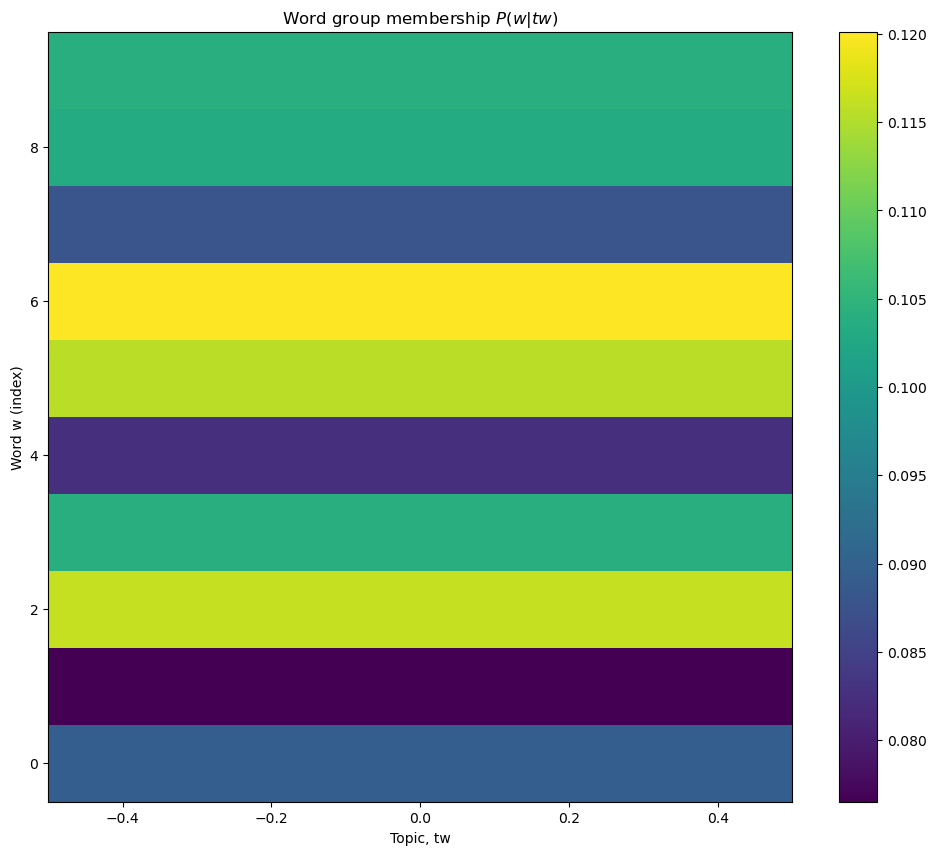

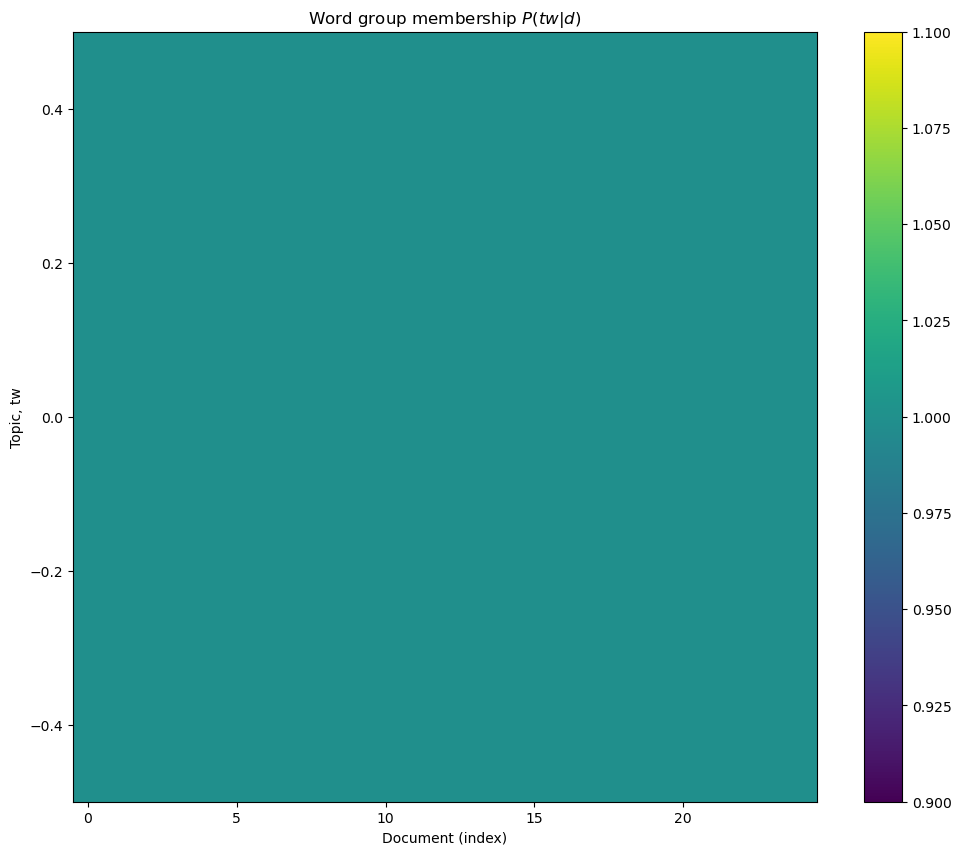

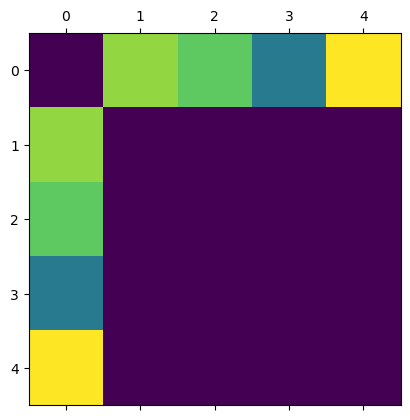

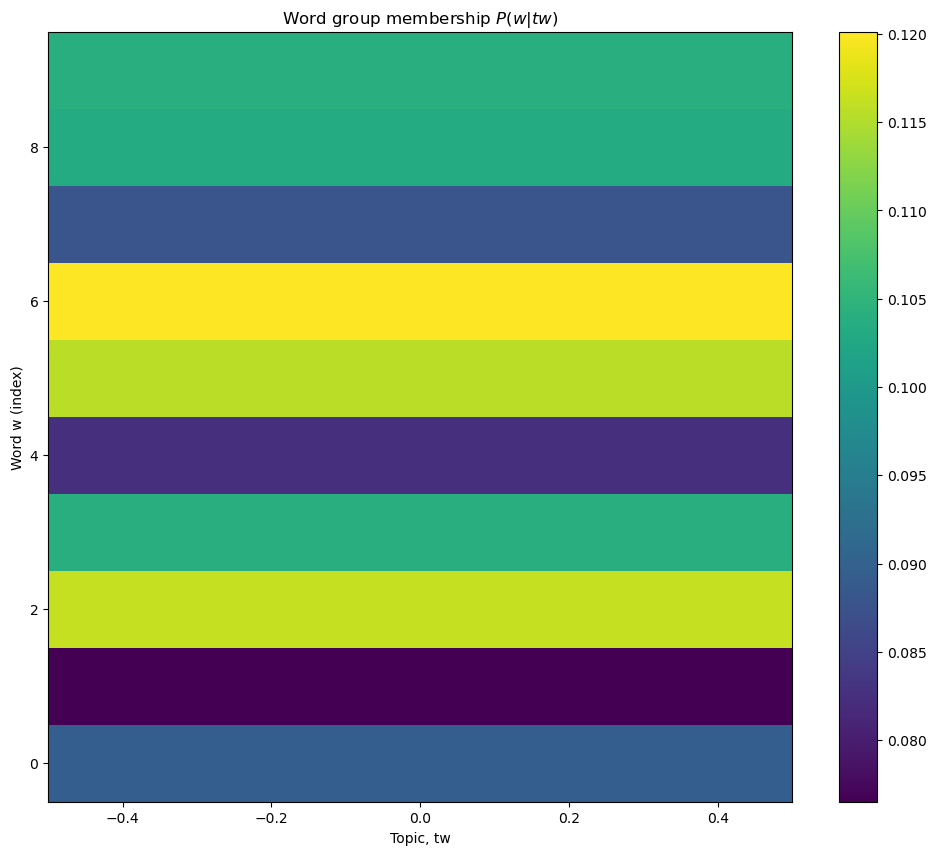

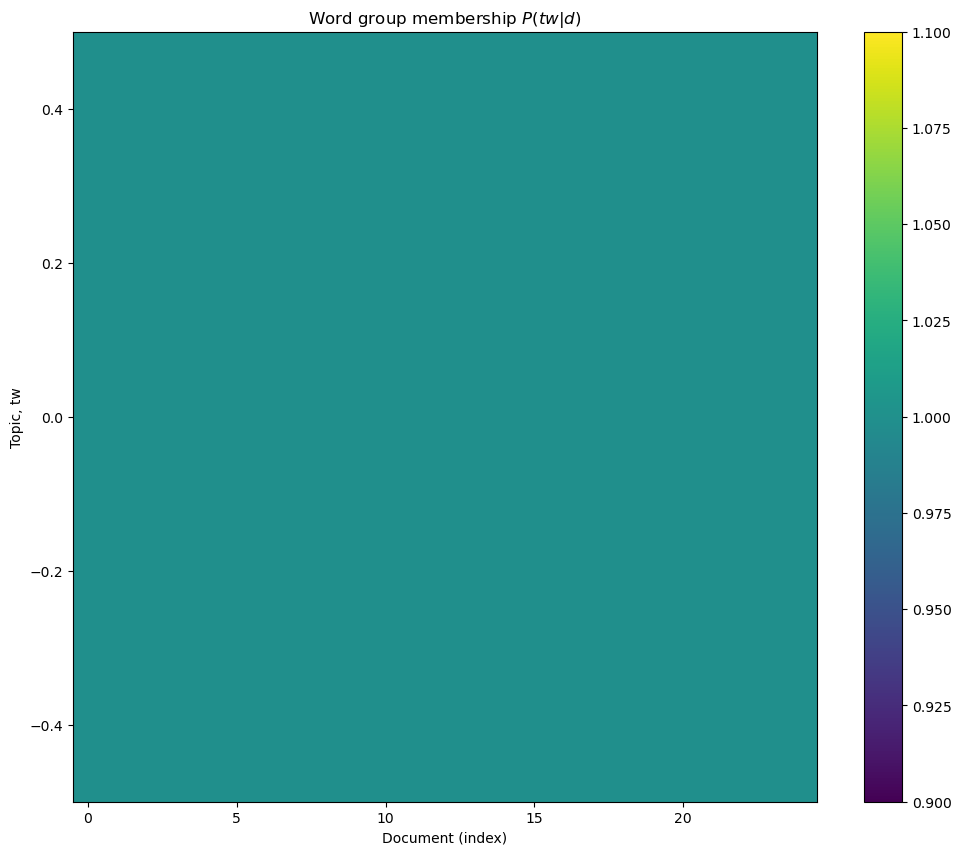

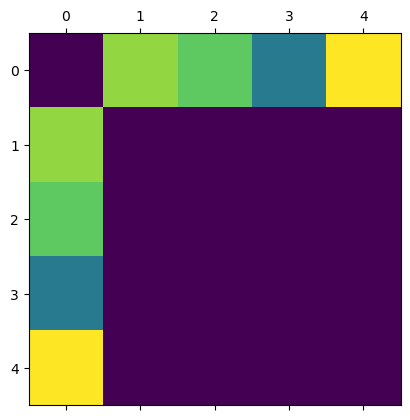

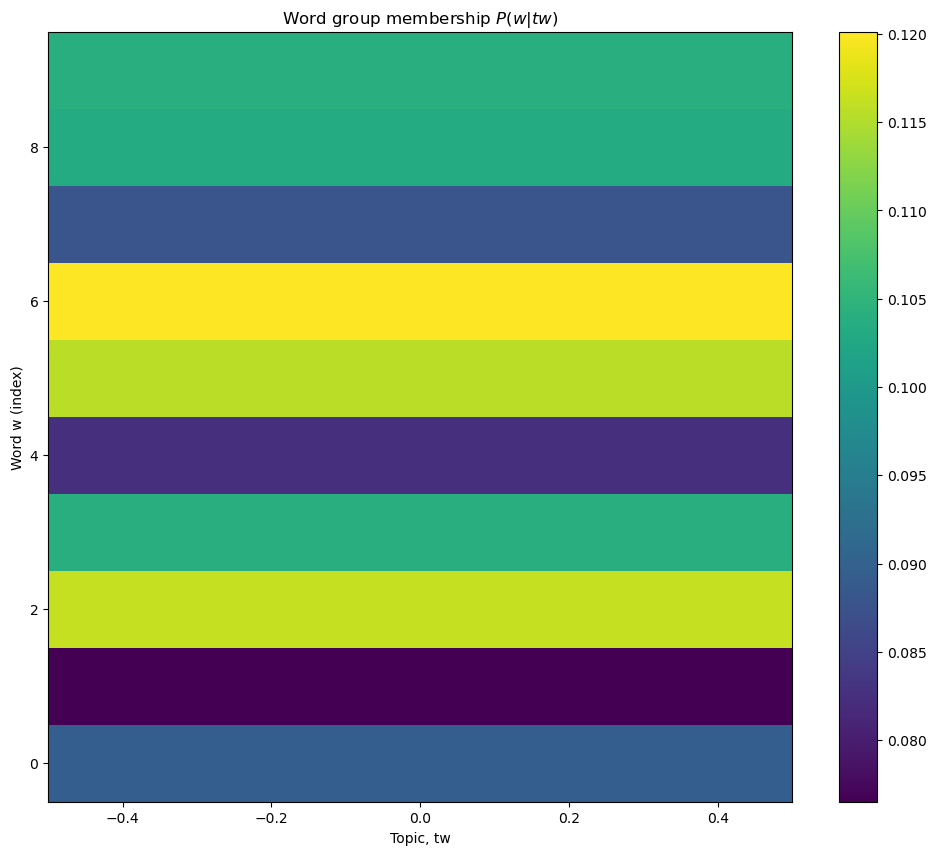

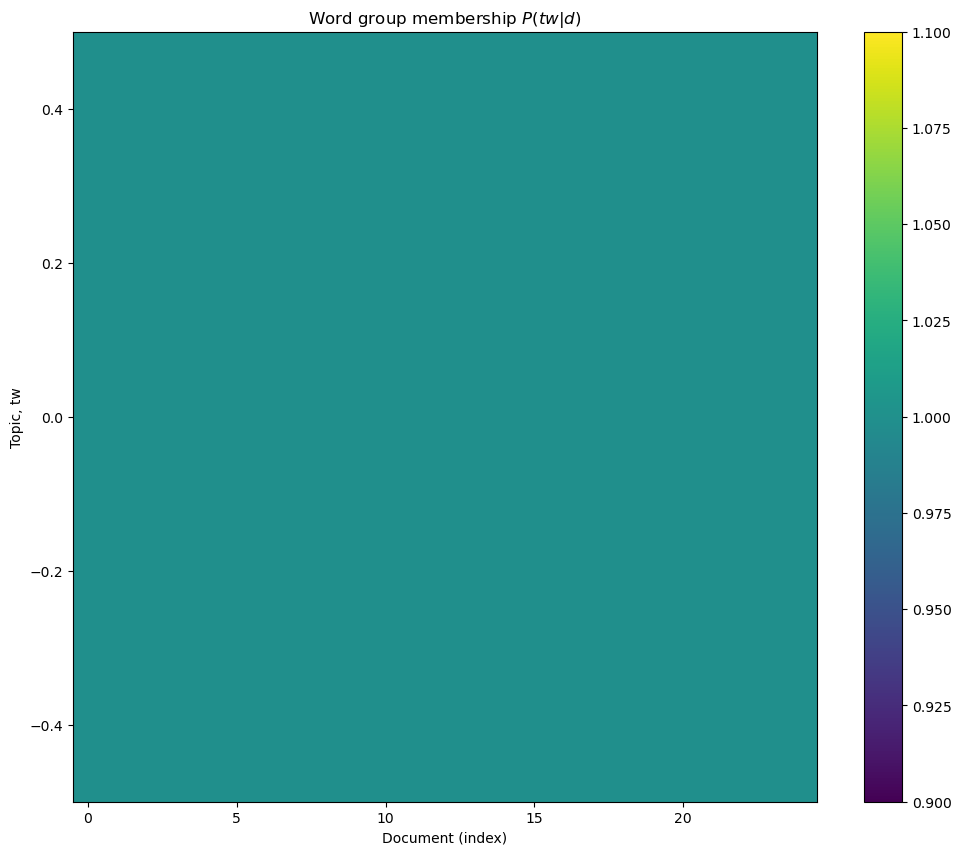

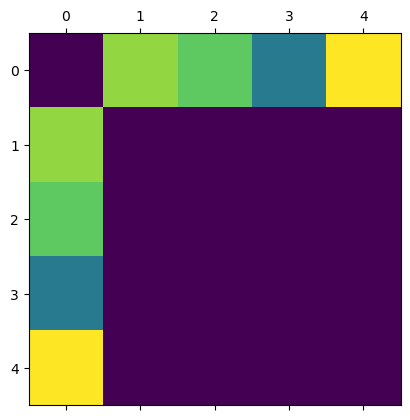

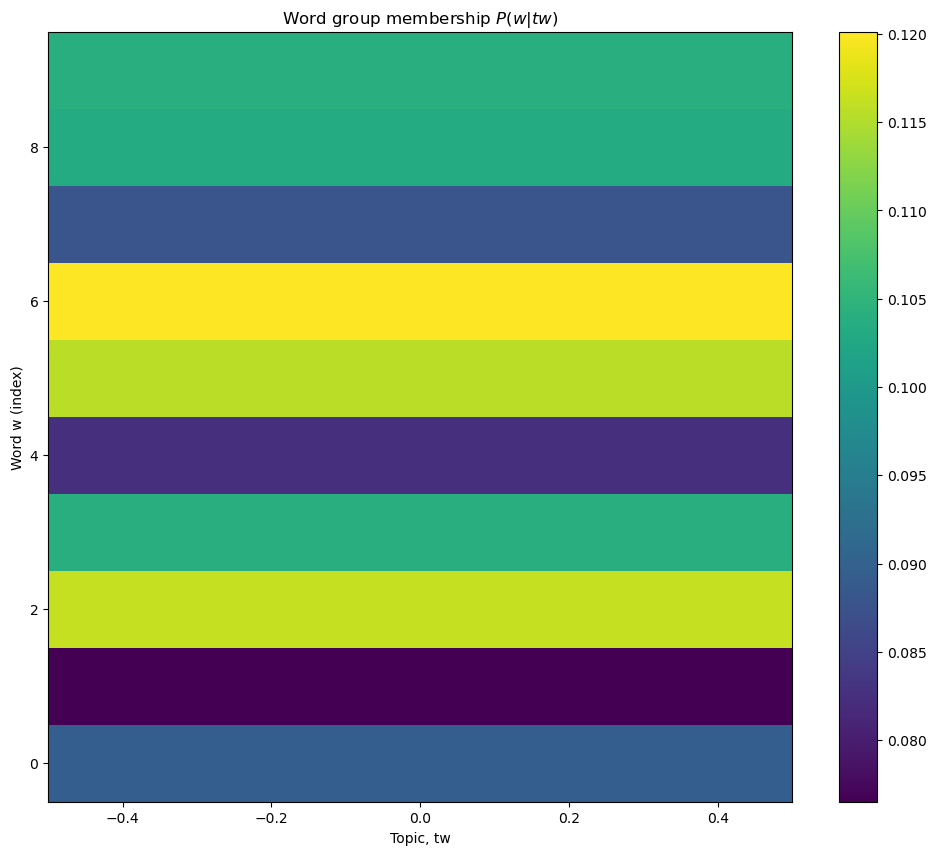

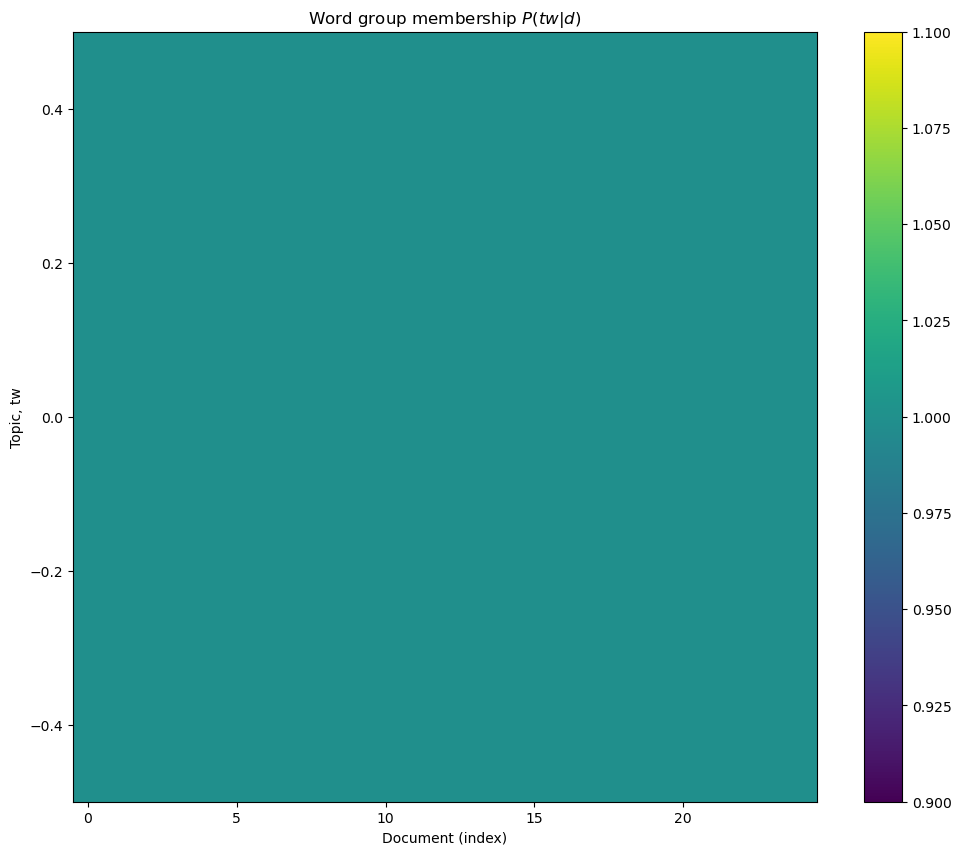

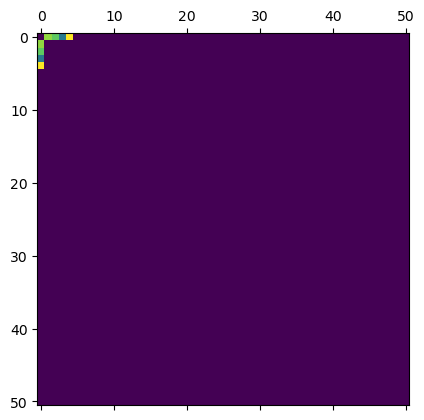

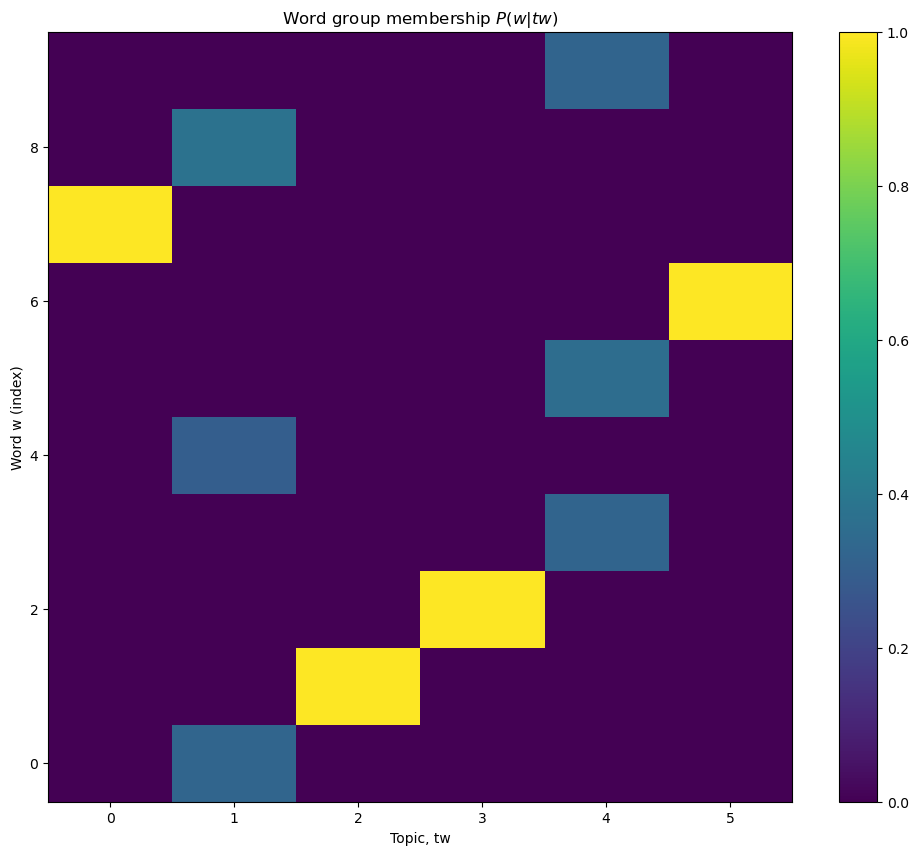

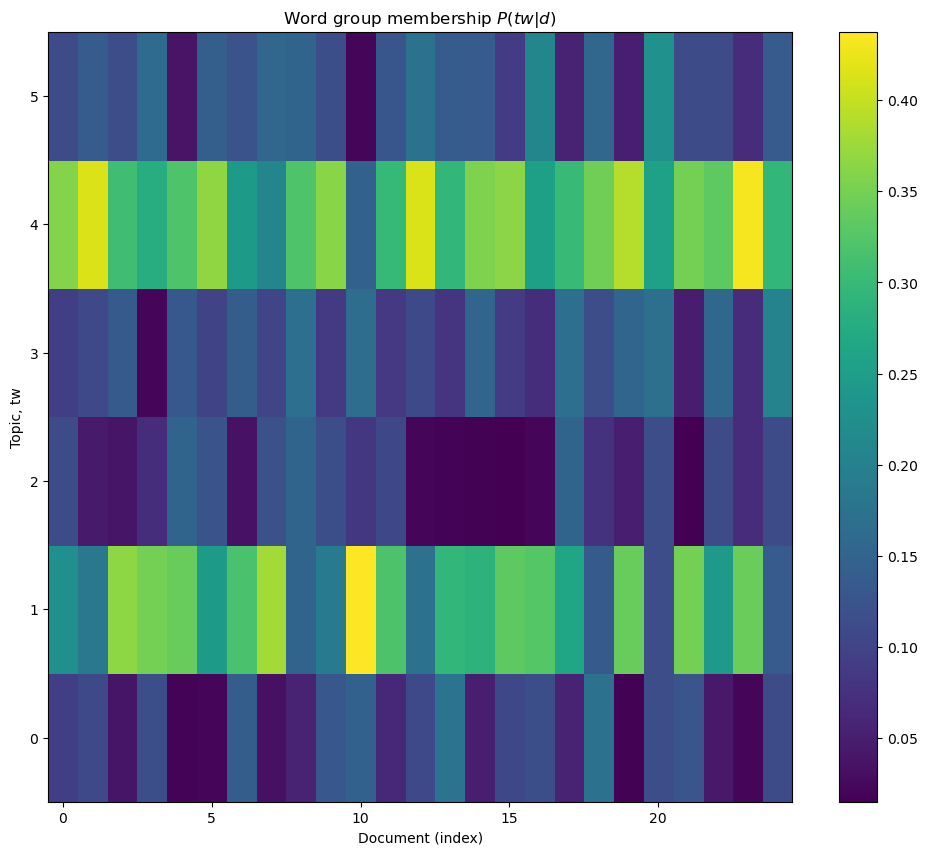

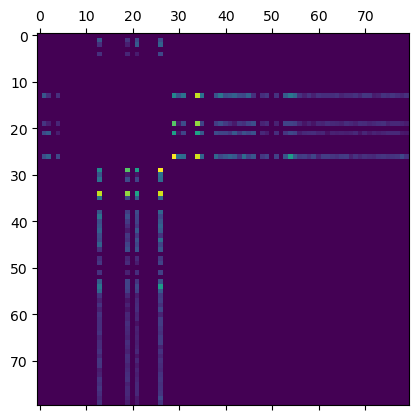

In [133]:
model.save_data()

In [134]:
model.print_summary()

In [135]:
model.metadata(l=0, n=-1, kind=2).keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [136]:
import graph_tool.all as gt

In [137]:
colmap = model.g.vertex_properties["color"] = model.g.new_vertex_property("vector<double>")
for v in model.g.vertices():
    k = model.g.vertex_properties['kind'][v]
    if k < 1:
        color = np.array([137,128,193])/255.
    elif k < 2:
        color = np.array([130,200,93])/255.
    elif k < 3:
        color = np.array([210,82,58])/255.
    elif k < 4:
        color = np.array([196,125,50])/255.
    else:
        color = np.array([187,129,164])/255.
    colmap[v] = color

In [138]:
gt.draw_hierarchy(model.state,
                layout="bipartite",
                subsample_edges=3500,
                vertex_color=colmap,
                vertex_fill_color=colmap,
                hedge_pen_width=5,
                hvertex_size=15,
                edge_pen_width=model.g.ep["count"],
                output="nsbm.png"
                 )

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ba6a8773d90, at 0x7ba6a7015240>,
 <GraphView object, directed, with 162 vertices and 161 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7ba6a6616d10, at 0x7ba67a8b71f0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7ba6a6616d10, at 0x7ba6a6803a00>, False), at 0x7ba6a6616d10>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ba6a6616d10, at 0x7ba6a672e650>)